In [130]:
# import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
# Importing libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [142]:
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline as skPipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score


In [2]:
cd /Users/theodruilhe/Documents/documents_mac_book_air/M2_D3S/scoring3/churn_prediction

/Users/theodruilhe/Documents/documents_mac_book_air/M2_D3S/scoring3/churn_prediction


In [3]:
df = pd.read_csv("data/data.csv", delimiter=",")
df.head()

id  gender  customer_senior customer_partner dependent_family  \
0  7590-VHVEG  Female                0              Yes               No   
1  5575-GNVDE    Male                0               No               No   
2  3668-QPYBK    Male                0               No               No   
3  7795-CFOCW    Male                0               No               No   
4  9237-HQITU  Female                0               No               No   

   month_tenure phone_subscription     multiple_line internet_type  \
0             1                 No  No phone service           DSL   
1            34                Yes                No           DSL   
2             2                Yes                No           DSL   
3            45                 No  No phone service           DSL   
4             2                Yes                No   Fiber optic   

  online_security  ... device_protection_plan techinal_support streaming_tv  \
0              No  ...                     No               No           No   
1             Yes  ...                    Yes               No           No   
2             Yes  ...                     No               No           No   
3             Yes  ...                    Yes              Yes           No   
4              No  ...                     No               No           No   

  streaming_movie   contract_type paperless_billing  \
0              No  Month-to-month               Yes   
1              No        One year                No   
2              No  Month-to-month               Yes   
3              No        One year                No   
4              No  Month-to-month               Yes   

         payment_method_type amount_charges_monthly  amount_total_charges  \
0           Electronic check                  29.85                 29.85   
1               Mailed check                  56.95               1889.50   
2               Mailed check                  53.85                108.15   
3  Bank transfer (automatic)                  42.30               1840.75   
4           Electronic check                  70.70                151.65   

   churn  
0     No  
1     No  
2    Yes  
3     No  
4    Yes  

[5 rows x 21 columns]

In [4]:
print(df.shape)

# Get general information about each column
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   customer_senior         7043 non-null   int64  
 3   customer_partner        7043 non-null   object 
 4   dependent_family        7043 non-null   object 
 5   month_tenure            7043 non-null   int64  
 6   phone_subscription      7043 non-null   object 
 7   multiple_line           7043 non-null   object 
 8   internet_type           7043 non-null   object 
 9   online_security         7043 non-null   object 
 10  backup_service_online   7043 non-null   object 
 11  device_protection_plan  7043 non-null   object 
 12  techinal_support        7043 non-null   object 
 13  streaming_tv            7043 non-null   object 
 14  streaming_movie         7043 

In [5]:
# Check for any missing values
print(df.isnull().sum())

id                         0
gender                     0
customer_senior            0
customer_partner           0
dependent_family           0
month_tenure               0
phone_subscription         0
multiple_line              0
internet_type              0
online_security            0
backup_service_online      0
device_protection_plan     0
techinal_support           0
streaming_tv               0
streaming_movie            0
contract_type              0
paperless_billing          0
payment_method_type        0
amount_charges_monthly     0
amount_total_charges      11
churn                      0
dtype: int64


In [6]:
# delete the missing values for the colmumn amount_total_charges
df = df.dropna(subset=['amount_total_charges'])
print(df.shape)

(7032, 21)


In [7]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [9]:
print(df.columns)

Index(['id', 'gender', 'customer_senior', 'customer_partner',
       'dependent_family', 'month_tenure', 'phone_subscription',
       'multiple_line', 'internet_type', 'online_security',
       'backup_service_online', 'device_protection_plan', 'techinal_support',
       'streaming_tv', 'streaming_movie', 'contract_type', 'paperless_billing',
       'payment_method_type', 'amount_charges_monthly', 'amount_total_charges',
       'churn'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   customer_senior         7032 non-null   int64  
 3   customer_partner        7032 non-null   object 
 4   dependent_family        7032 non-null   object 
 5   month_tenure            7032 non-null   int64  
 6   phone_subscription      7032 non-null   object 
 7   multiple_line           7032 non-null   object 
 8   internet_type           7032 non-null   object 
 9   online_security         7032 non-null   object 
 10  backup_service_online   7032 non-null   object 
 11  device_protection_plan  7032 non-null   object 
 12  techinal_support        7032 non-null   object 
 13  streaming_tv            7032 non-null   object 
 14  streaming_movie         7032 non-null   objec

## Mapping

In [11]:
mapping_dict = {
    "gender": {
        "Male": 1,
        "Female": 0
    },
    "customer_senior": {
        1: 1,
        0: 0
    },
    "internet_type": {
        "Fiber optic": 2,
        "DSL": 1,
        "No": 0
    },
    "contract_type": {
        "Two year": 2,
        "One year": 1,
        "Month-to-month": 0
    },
    "payment_method_type": {
        "Electronic check": 3,
        "Mailed check": 2,
        "Bank transfer (automatic)": 1,
        "Credit card (automatic)": 0
    },
    "multiple_line" : {
        "Yes": 2,
        "No": 1,
        "No phone service": 0
    },
    "binary": {
        "Yes": 1,
        "No": 0
    },
    "multiple" : {
        "Yes": 2,
        "No": 1,
        "No internet service": 0
    }
}

In [12]:
df_mapped = df.copy()

for col in df_mapped:
    if col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

df_mapped

id  gender  customer_senior  customer_partner  dependent_family  \
0     7590-VHVEG       0                0                 1                 0   
1     5575-GNVDE       1                0                 0                 0   
2     3668-QPYBK       1                0                 0                 0   
3     7795-CFOCW       1                0                 0                 0   
4     9237-HQITU       0                0                 0                 0   
...          ...     ...              ...               ...               ...   
7038  6840-RESVB       1                0                 1                 1   
7039  2234-XADUH       0                0                 1                 1   
7040  4801-JZAZL       0                0                 1                 1   
7041  8361-LTMKD       1                1                 1                 0   
7042  3186-AJIEK       1                0                 0                 0   

      month_tenure  phone_subscription  multiple_line  internet_type  \
0                1                   0              0              1   
1               34                   1              1              1   
2                2                   1              1              1   
3               45                   0              0              1   
4                2                   1              1              2   
...            ...                 ...            ...            ...   
7038            24                   1              2              1   
7039            72                   1              2              2   
7040            11                   0              0              1   
7041             4                   1              2              2   
7042            66                   1              1              2   

      online_security  ...  device_protection_plan  techinal_support  \
0                   1  ...                       1                 1   
1                   2  ...                       2                 1   
2                   2  ...                       1                 1   
3                   2  ...                       2                 2   
4                   1  ...                       1                 1   
...               ...  ...                     ...               ...   
7038                2  ...                       2                 2   
7039                1  ...                       2                 1   
7040                2  ...                       1                 1   
7041                1  ...                       1                 1   
7042                2  ...                       2                 2   

      streaming_tv  streaming_movie  contract_type  paperless_billing  \
0                1                1              0                  1   
1                1                1              1                  0   
2                1                1              0                  1   
3                1                1              1                  0   
4                1                1              0                  1   
...            ...              ...            ...                ...   
7038             2                2              1                  1   
7039             2                2              1                  1   
7040             1                1              0                  1   
7041             1                1              0                  1   
7042             2                2              2                  1   

      payment_method_type  amount_charges_monthly  amount_total_charges  churn  
0                       3                   29.85                 29.85      0  
1                       2                   56.95               1889.50      0  
2                       2                   53.85                108.15      1  
3                       1                   42.30               1840.75      0  
4                       3    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   customer_senior         7032 non-null   int64  
 3   customer_partner        7032 non-null   object 
 4   dependent_family        7032 non-null   object 
 5   month_tenure            7032 non-null   int64  
 6   phone_subscription      7032 non-null   object 
 7   multiple_line           7032 non-null   object 
 8   internet_type           7032 non-null   object 
 9   online_security         7032 non-null   object 
 10  backup_service_online   7032 non-null   object 
 11  device_protection_plan  7032 non-null   object 
 12  techinal_support        7032 non-null   object 
 13  streaming_tv            7032 non-null   object 
 14  streaming_movie         7032 non-null   objec

# Descriptive Statistics

## Categorical variables

In [14]:
# Loop through each categorical column and plot count plots
categorical_columns = ['gender', 'customer_senior', 'customer_partner', 'dependent_family', 
                       'phone_subscription', 'multiple_line', 'internet_type', 
                       'online_security', 'backup_service_online', 'device_protection_plan', 
                       'techinal_support', 'streaming_tv', 'streaming_movie', 
                       'contract_type', 'paperless_billing', 'payment_method_type', 'churn']

import plotly.express as px

# Loop through each categorical column and create a count plot with Plotly
for col in categorical_columns:
    # Calculate counts of each category in the column
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']  # Rename columns for better labels
    
    # Create a Plotly bar chart
    fig = px.bar(
        counts,
        x=col,
        y='Count',
        title=f'Distribution of {col}',
        labels={col: col, 'Count': 'Count'},
        color_discrete_sequence=px.colors.sequential.Viridis
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        title_x=0.5,  # Center title
        xaxis=dict(tickangle=-45)  # Rotate x-axis labels for better readability
    )
    
    # Show the figure
    fig.show()

## Quantitative variables

In [15]:
import plotly.express as px

# List of numerical columns
numerical_columns = ['month_tenure', 'amount_charges_monthly', 'amount_total_charges']

# Loop through each numerical column and create separate plots for histogram and box plot
for col in numerical_columns:
    # Histogram for the distribution
    fig_hist = px.histogram(
        df,
        x=col,
        nbins=30,  # Adjust number of bins as needed
        title=f'Distribution of {col}',
        labels={col: col, 'count': 'Frequency'},
        color_discrete_sequence=['#4c72b0']
    )
    fig_hist.update_layout(
        xaxis_title=col,
        yaxis_title="Frequency",
        template="plotly_white"
    )
    fig_hist.show()

    # Box plot for outlier detection
    fig_box = px.box(
        df,
        x=col,
        title=f'Outliers in {col}',
        labels={col: col},
        color_discrete_sequence=['#55a868']
    )
    fig_box.update_layout(
        xaxis_title=col,
        template="plotly_white"
    )
    fig_box.show()

# Bivariate Analysis

In [16]:
# Loop through each categorical column and plot proportions with Plotly
for col in categorical_columns:
    if col != 'churn':  # Skip 'churn' itself
        # Calculate proportions
        prop_df = df.groupby([col, 'churn']).size().unstack().fillna(0)
        prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)  # Convert counts to proportions

        # Create Plotly bar chart
        fig = go.Figure()
        
        # Add churn = 'No' bars
        fig.add_trace(go.Bar(
            x=prop_df.index,
            y=prop_df['No'],  # Adjust based on churn labels
            name='No Churn',
            marker_color='#4c72b0'
        ))

        # Add churn = 'Yes' bars
        fig.add_trace(go.Bar(
            x=prop_df.index,
            y=prop_df['Yes'],  # Adjust based on churn labels
            name='Churn',
            marker_color='#55a868'
        ))

        # Update layout for better visualization
        fig.update_layout(
            barmode='stack',
            title=f'Proportion of Churn by {col}',
            xaxis_title=col,
            yaxis_title='Proportion',
            yaxis=dict(tickformat=".0%"),
            legend_title_text='Churn'
        )

        fig.show()

In [17]:
import plotly.express as px

# List of numerical columns
numerical_columns = ['month_tenure', 'amount_charges_monthly', 'amount_total_charges']

# Loop through each numerical column and create plots comparing churn status
for col in numerical_columns:
    # Histogram to compare distributions by churn status
    fig_hist = px.histogram(
        df,
        x=col,
        color='churn',  # Group by churn status
        nbins=30,  # Adjust number of bins as needed
        title=f'Distribution of {col} by Churn Status',
        labels={col: col, 'count': 'Frequency'},
        color_discrete_sequence=['#4c72b0', '#55a868']
    )
    fig_hist.update_layout(
        xaxis_title=col,
        yaxis_title="Frequency",
        barmode='overlay',  # Overlay bars for comparison
        template="plotly_white"
    )
    fig_hist.show()

    # Box plot to compare outliers by churn status
    fig_box = px.box(
        df,
        x='churn',
        y=col,
        title=f'{col} by Churn Status',
        labels={col: col, 'churn': 'Churn Status'},
        color='churn',
        color_discrete_sequence=['#4c72b0', '#55a868']
    )
    fig_box.update_layout(
        yaxis_title=col,
        template="plotly_white"
    )
    fig_box.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Correlation Analysis

### Chi-Square Test

In [95]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns (excluding 'churn')
categorical_columns = ['gender', 'customer_senior', 'customer_partner', 'dependent_family', 
                       'phone_subscription', 'multiple_line', 'internet_type', 
                       'online_security', 'backup_service_online', 'device_protection_plan', 
                       'techinal_support', 'streaming_tv', 'streaming_movie', 
                       'contract_type', 'paperless_billing', 'payment_method_type']

# Your target variable
target = 'churn'

# Create a dictionary to store the p-values
chi2_results = {}

# Loop through each categorical column and perform the Chi-square test
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df[target])
    
    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_results[col] = p_value

# Filter the results to get only significant p-values
significant_results = {col: p_value for col, p_value in chi2_results.items() if p_value < 0.05}
non_significant_results = {col: p_value for col, p_value in chi2_results.items() if p_value >= 0.05}

# Display the significant results
if significant_results:
    print("Significant relationships (p-value < 0.05):")
    for col, p_value in significant_results.items():
        print(f'{col}: p-value = {p_value}')
else:
    print("No significant relationships (p-value < 0.05) found.")

Significant relationships (p-value < 0.05):
customer_senior: p-value = 2.4792557203954705e-36
customer_partner: p-value = 3.97379757451591e-36
dependent_family: p-value = 2.0196592017051303e-42
multiple_line: p-value = 0.0035679273999811405
internet_type: p-value = 5.831198962237274e-159
online_security: p-value = 1.4006867477839222e-184
backup_service_online: p-value = 7.776099238804965e-131
device_protection_plan: p-value = 1.9593887862403176e-121
techinal_support: p-value = 7.407807748843711e-180
streaming_tv: p-value = 1.324641113169159e-81
streaming_movie: p-value = 5.353560421401324e-82
contract_type: p-value = 7.326182186265472e-257
paperless_billing: p-value = 8.236203353962564e-58
payment_method_type: p-value = 1.4263098511063342e-139


In [93]:
significant_columns = list(significant_results.keys())
significant_columns

['customer_senior',
 'customer_partner',
 'dependent_family',
 'multiple_line',
 'internet_type',
 'online_security',
 'backup_service_online',
 'device_protection_plan',
 'techinal_support',
 'streaming_tv',
 'streaming_movie',
 'contract_type',
 'paperless_billing',
 'payment_method_type']

In [ ]:
non_significant_columns = list(non_significant_results.keys())
non_significant_columns

['gender', 'phone_subscription']

### Test for quantitative variables

In [94]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Define your numerical columns
numerical_columns = ['month_tenure', 'amount_charges_monthly', 'amount_total_charges']

# Target variable
target = 'churn'

# Create a dictionary to store p-values for each variable
test_results = {}

# Loop through each numerical column and perform the T-test or Mann-Whitney U Test
for col in numerical_columns:
    # Split the data into two groups based on churn
    churn_yes = df[df[target] == 'Yes'][col]
    churn_no = df[df[target] == 'No'][col]
    
    # Check the normality of the variables (you can use a simple histogram or a statistical test like Shapiro-Wilk if needed)
    # Here we proceed with a T-test and fallback to Mann-Whitney U if needed
    try:
        # Perform T-test for normal distributions
        t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)
        test_results[col] = {'test': 'T-test', 'p_value': p_value}
    except:
        # If T-test fails, use Mann-Whitney U test (non-parametric)
        u_stat, p_value = mannwhitneyu(churn_yes, churn_no)
        test_results[col] = {'test': 'Mann-Whitney U', 'p_value': p_value}

# Filter results to show only significant p-values (p-value < 0.05)
significant_results = {col: result for col, result in test_results.items() if result['p_value'] < 0.05}

# Display the significant results
if significant_results:
    print("Significant relationships (p-value < 0.05):")
    for col, result in significant_results.items():
        print(f'{col}: Test = {result["test"]}, p-value = {result["p_value"]}')
else:
    print("No significant relationships (p-value < 0.05) found.")

Significant relationships (p-value < 0.05):
month_tenure: Test = T-test, p-value = 2.3470747188949523e-234
amount_charges_monthly: Test = T-test, p-value = 2.6573571445160277e-72
amount_total_charges: Test = T-test, p-value = 1.1524944112838114e-75


## Correspondence Analysis

In [20]:
import prince

In [53]:
# Select only the categorical columns
categorical_columns = ['gender', 'customer_senior', 'customer_partner', 'dependent_family', 
                       'phone_subscription', 'multiple_line', 'internet_type', 
                       'online_security', 'backup_service_online', 'device_protection_plan', 
                       'techinal_support', 'streaming_tv', 'streaming_movie', 
                       'contract_type', 'paperless_billing', 'payment_method_type']
df_categorical = df[categorical_columns]
df_categorical.head()

gender  customer_senior customer_partner dependent_family  \
0  Female                0              Yes               No   
1    Male                0               No               No   
2    Male                0               No               No   
3    Male                0               No               No   
4  Female                0               No               No   

  phone_subscription     multiple_line internet_type online_security  \
0                 No  No phone service           DSL              No   
1                Yes                No           DSL             Yes   
2                Yes                No           DSL             Yes   
3                 No  No phone service           DSL             Yes   
4                Yes                No   Fiber optic              No   

  backup_service_online device_protection_plan techinal_support streaming_tv  \
0                   Yes                     No               No           No   
1                    No                    Yes               No           No   
2                   Yes                     No               No           No   
3                    No                    Yes              Yes           No   
4                    No                     No               No           No   

  streaming_movie   contract_type paperless_billing        payment_method_type  
0              No  Month-to-month               Yes           Electronic check  
1              No        One year                No               Mailed check  
2              No  Month-to-month               Yes               Mailed check  
3              No        One year                No  Bank transfer (automatic)  
4              No  Month-to-month               Yes           Electronic check

In [54]:
print(df_categorical.dtypes)

gender                    object
customer_senior            int64
customer_partner          object
dependent_family          object
phone_subscription        object
multiple_line             object
internet_type             object
online_security           object
backup_service_online     object
device_protection_plan    object
techinal_support          object
streaming_tv              object
streaming_movie           object
contract_type             object
paperless_billing         object
payment_method_type       object
dtype: object


In [55]:
# encore custumer_senior as Yes or No instead of 1/0
df_categorical['customer_senior'] = df['customer_senior'].map({1: 'Yes', 0: 'No'})
df_categorical.head()

/var/folders/p6/w184zl5j6xb6h67vhzjht06r0000gn/T/ipykernel_14813/2341389817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gender customer_senior customer_partner dependent_family  \
0  Female              No              Yes               No   
1    Male              No               No               No   
2    Male              No               No               No   
3    Male              No               No               No   
4  Female              No               No               No   

  phone_subscription     multiple_line internet_type online_security  \
0                 No  No phone service           DSL              No   
1                Yes                No           DSL             Yes   
2                Yes                No           DSL             Yes   
3                 No  No phone service           DSL             Yes   
4                Yes                No   Fiber optic              No   

  backup_service_online device_protection_plan techinal_support streaming_tv  \
0                   Yes                     No               No           No   
1                    No                    Yes               No           No   
2                   Yes                     No               No           No   
3                    No                    Yes              Yes           No   
4                    No                     No               No           No   

  streaming_movie   contract_type paperless_billing        payment_method_type  
0              No  Month-to-month               Yes           Electronic check  
1              No        One year                No               Mailed check  
2              No  Month-to-month               Yes               Mailed check  
3              No        One year                No  Bank transfer (automatic)  
4              No  Month-to-month               Yes           Electronic check

**Encode Categorical Variables as One-Hot Encoding**

In [56]:
df_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_encoded.head()

gender_Male  customer_senior_Yes  customer_partner_Yes  \
0        False                False                  True   
1         True                False                 False   
2         True                False                 False   
3         True                False                 False   
4        False                False                 False   

   dependent_family_Yes  phone_subscription_Yes  \
0                 False                   False   
1                 False                    True   
2                 False                    True   
3                 False                   False   
4                 False                    True   

   multiple_line_No phone service  multiple_line_Yes  \
0                            True              False   
1                           False              False   
2                           False              False   
3                            True              False   
4                           False              False   

   internet_type_Fiber optic  internet_type_No  \
0                      False             False   
1                      False             False   
2                      False             False   
3                      False             False   
4                       True             False   

   online_security_No internet service  ...  streaming_tv_No internet service  \
0                                False  ...                             False   
1                                False  ...                             False   
2                                False  ...                             False   
3                                False  ...                             False   
4                                False  ...                             False   

   streaming_tv_Yes  streaming_movie_No internet service  streaming_movie_Yes  \
0             False                                False                False   
1             False                                False                False   
2             False                                False                False   
3             False                                False                False   
4             False                                False                False   

   contract_type_One year  contract_type_Two year  paperless_billing_Yes  \
0                   False                   False                   True   
1                    True                   False                  False   
2                   False                   False                   True   
3                    True                   False                  False   
4                   False                   False                   True   

   payment_method_type_Credit card (automatic)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   payment_method_type_Electronic check  payment_method_type_Mailed check  
0                                  True                             False  
1                                 False                              True  
2                                 False                              True  
3                                 False                             False  
4                                  True                             False  

[5 rows x 27 columns]

**Initialization of the Correspondence Analysis**

In [57]:
# Initialize the Correspondence Analysis model with a specified engine
ca = prince.CA(
    n_components=10,       # Number of dimensions to reduce to (e.g., for 2D visualization)
    n_iter=100,            # Number of iterations for SVD
    copy=True,            # Whether to copy input data
    check_input=True,     # Whether to check input format
    engine='sklearn',     # Specify the engine explicitly to avoid the error
    random_state=42       # Set random state for reproducibility
)

# Fit the model to the data
ca = ca.fit(df_encoded)

**Choose the number of dimensions to keep**

In [58]:
# Access the eigenvalues (variance explained by each dimension)
eigenvalues = ca.eigenvalues_

# Print inertia for each dimension
print("Eigenvalues (inertia) for each dimension:", eigenvalues)

Eigenvalues (inertia) for each dimension: [0.61842947 0.21408138 0.16661622 0.12335132 0.10346146 0.10022713
 0.08888677 0.08393027 0.0767909  0.06453895]


In [60]:
# Calculate the proportion of inertia explained by each component
inertia_explained = eigenvalues / eigenvalues.sum() * 100

# Print the percentage of explained inertia for each dimension
print("Proportion of inertia explained by each dimension:", inertia_explained)

Proportion of inertia explained by each dimension: [37.7018986  13.05124458 10.15758149  7.51998276  6.30741839  6.1102412
  5.41888799  5.11671992  4.68147608  3.934549  ]


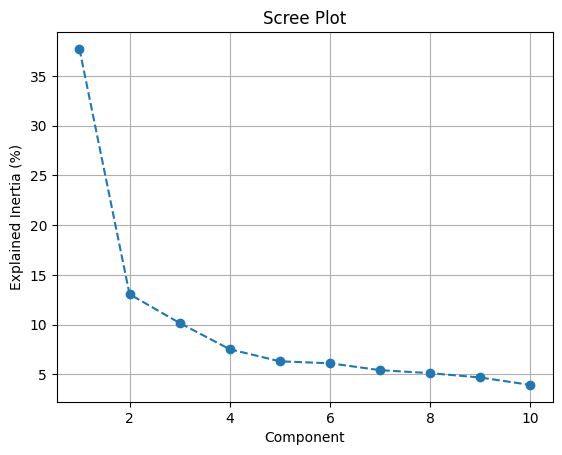

In [64]:
# Plot the explained inertia for each component (Scree plot)
plt.plot(range(1, len(inertia_explained) + 1), inertia_explained, marker='o', linestyle='--')
plt.xlabel("Component")
plt.ylabel("Explained Inertia (%)")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

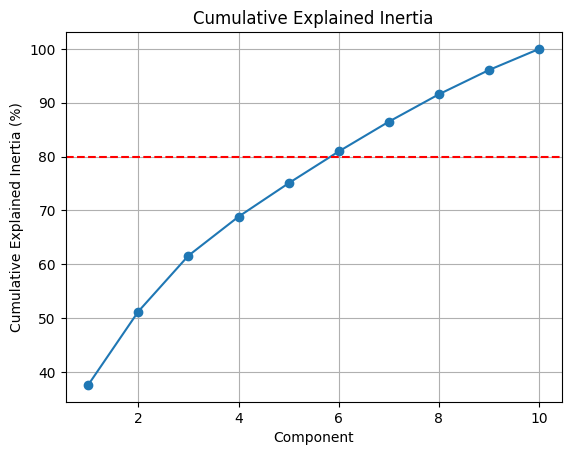

Number of components to retain (explaining 80% of variance): 5


In [63]:
# Plot the cumulative explained inertia
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, marker='o', linestyle='-')
plt.xlabel("Component")
plt.ylabel("Cumulative Explained Inertia (%)")
plt.title("Cumulative Explained Inertia")
plt.grid(True)
plt.axhline(y=80, color='r', linestyle='--')  # Add a horizontal line for 80% threshold
plt.show()

# Print the components that explain up to 80% of the inertia
threshold = 80
components_to_retain = (cumulative_inertia <= threshold).sum()
print(f"Number of components to retain (explaining {threshold}% of variance): {components_to_retain}")

In [67]:
# Initialize the Correspondence Analysis model with a specified engine
ca = prince.CA(
    n_components=5,       # Number of dimensions to reduce to (e.g., for 2D visualization)
    n_iter=100,            # Number of iterations for SVD
    copy=True,            # Whether to copy input data
    check_input=True,     # Whether to check input format
    engine='sklearn',     # Specify the engine explicitly to avoid the error
    random_state=42       # Set random state for reproducibility
)

# Fit the model to the data
ca = ca.fit(df_encoded)

In [68]:
# Get the row coordinates (corresponding to the original categories)
row_coords = ca.row_coordinates(df_encoded)

# Get the column coordinates
column_coords = ca.column_coordinates(df_encoded)

In [71]:
# Compute squared contributions of the row and column coordinates
row_contrib = row_coords**2 / row_coords.sum().sum()
column_contrib = column_coords**2 / column_coords.sum().sum()

# Print row and column contributions
# print("Row contributions:\n", row_contrib)
print("Column contributions:\n", column_contrib)

Column contributions:
                                                     0         1         2  \
gender_Male                                  0.001482  0.000014  0.007355   
customer_senior_Yes                          0.042041  0.070420  0.055193   
customer_partner_Yes                         0.002322  0.003465  0.003063   
dependent_family_Yes                         0.000846  0.019903  0.006417   
phone_subscription_Yes                       0.000588  0.009258  0.000809   
multiple_line_No phone service               0.050115  0.687154  0.776338   
multiple_line_Yes                            0.018827  0.017265  0.010339   
internet_type_Fiber optic                    0.049689  0.062965  0.000113   
internet_type_No                             0.289962  0.000534  0.000191   
online_security_No internet service          0.289962  0.000534  0.000191   
online_security_Yes                          0.041704  0.049675  0.014738   
backup_service_online_No internet service    0.289962

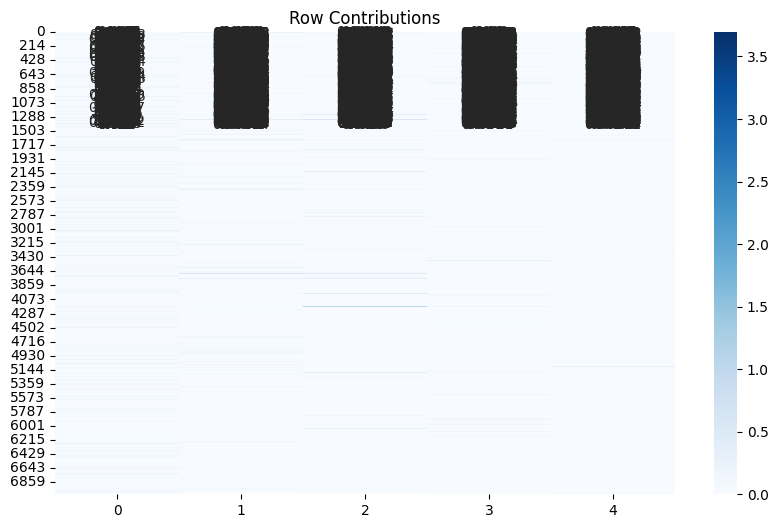

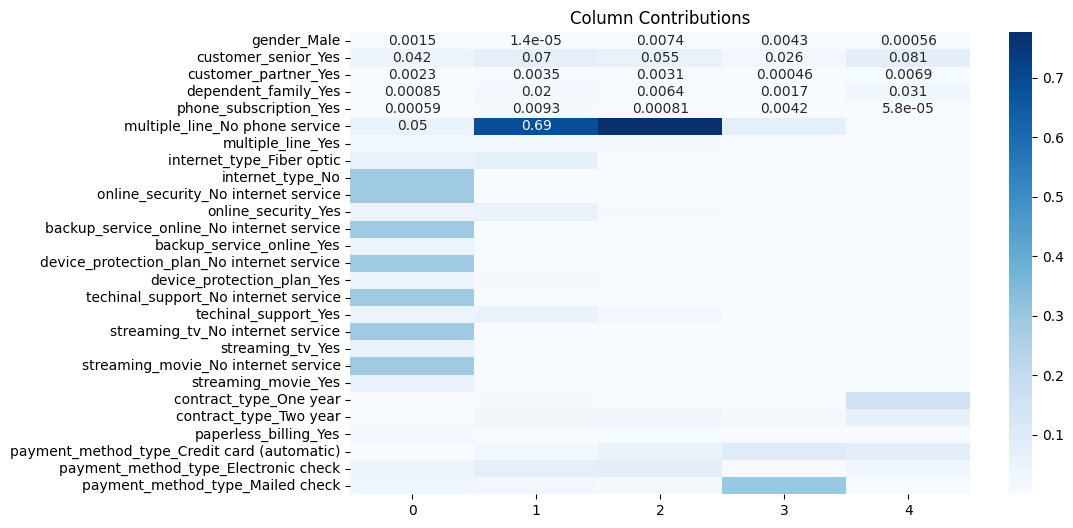

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot row contributions
plt.figure(figsize=(10, 6))
sns.heatmap(row_contrib, annot=True, cmap="Blues", cbar=True)
plt.title("Row Contributions")
plt.show()

# Plot column contributions
plt.figure(figsize=(10, 6))
sns.heatmap(column_contrib, annot=True, cmap="Blues", cbar=True)
plt.title("Column Contributions")
plt.show()

In [81]:
import plotly.express as px

# Ensure 'churn' is encoded as numeric (0 = No, 1 = Yes)
df['churn_encoded'] = df['churn'].map({'No': 0, 'Yes': 1})

# Use the row coordinates (not column coordinates) for the scatter plot
# Assuming that you want to visualize the rows' relationships in the first two components
row_coords = ca.row_coordinates(df_encoded)  # Row coordinates after CA

# Plot the scatter plot using Plotly
fig = px.scatter(
    x=row_coords[0],  # First component of row coordinates
    y=row_coords[1],  # Second component of row coordinates
    color=df['churn_encoded'],  # Color points based on churn status
    color_continuous_scale='Viridis',  # Set the color scale
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Churn'},  # Axis and legend labels
    title='First Two Components of Row Coordinates with Churn',
    width=1000,  # Adjust width to 1000 px
    height=800 
)

# Show the plot
fig.show()

In [86]:
import plotly.graph_objects as go

# Ensure 'churn' is encoded as numeric (0 = No, 1 = Yes)
df['churn_encoded'] = df['churn'].map({'No': 0, 'Yes': 1})

# Use the row coordinates (3 components) for the 3D scatter plot
row_coords = ca.row_coordinates(df_encoded)  # Get the row coordinates from CA

# Create the 3D scatter plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=row_coords[0],  # Component 1
    y=row_coords[1],  # Component 2
    z=row_coords[2],  # Component 3
    mode='markers',  # Show as markers (points)
    marker=dict(
        size=5,  # Marker size
        color=df['churn_encoded'],  # Color by churn status (encoded)
        colorscale='Viridis',  # Set the colorscale
        opacity=0.8  # Set opacity for better visualization
    ),
)])

# Update layout (labels, title, etc.)
fig.update_layout(
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    title='3D Plot of Row Coordinates with Churn Status',
    width=800,  # Increase the width to 1500 px
    height=800  # Increase the height to 1200 px
)

# Show the plot
fig.show()

## Modelling

In [101]:
df

id  gender  customer_senior customer_partner dependent_family  \
0     7590-VHVEG  Female                0              Yes               No   
1     5575-GNVDE    Male                0               No               No   
2     3668-QPYBK    Male                0               No               No   
3     7795-CFOCW    Male                0               No               No   
4     9237-HQITU  Female                0               No               No   
...          ...     ...              ...              ...              ...   
7038  6840-RESVB    Male                0              Yes              Yes   
7039  2234-XADUH  Female                0              Yes              Yes   
7040  4801-JZAZL  Female                0              Yes              Yes   
7041  8361-LTMKD    Male                1              Yes               No   
7042  3186-AJIEK    Male                0               No               No   

      month_tenure phone_subscription     multiple_line internet_type  \
0                1                 No  No phone service           DSL   
1               34                Yes                No           DSL   
2                2                Yes                No           DSL   
3               45                 No  No phone service           DSL   
4                2                Yes                No   Fiber optic   
...            ...                ...               ...           ...   
7038            24                Yes               Yes           DSL   
7039            72                Yes               Yes   Fiber optic   
7040            11                 No  No phone service           DSL   
7041             4                Yes               Yes   Fiber optic   
7042            66                Yes                No   Fiber optic   

     online_security  ... streaming_tv streaming_movie   contract_type  \
0                 No  ...           No              No  Month-to-month   
1                Yes  ...           No              No        One year   
2                Yes  ...           No              No  Month-to-month   
3                Yes  ...           No              No        One year   
4                 No  ...           No              No  Month-to-month   
...              ...  ...          ...             ...             ...   
7038             Yes  ...          Yes             Yes        One year   
7039              No  ...          Yes             Yes        One year   
7040             Yes  ...           No              No  Month-to-month   
7041              No  ...           No              No  Month-to-month   
7042             Yes  ...          Yes             Yes        Two year   

     paperless_billing        payment_method_type amount_charges_monthly  \
0                  Yes           Electronic check                  29.85   
1                   No               Mailed check                  56.95   
2                  Yes               Mailed check                  53.85   
3                   No  Bank transfer (automatic)                  42.30   
4                  Yes           Electronic check                  70.70   
...                ...                        ...                    ...   
7038               Yes               Mailed check                  84.80   
7039               Yes    Credit card (automatic)                 103.20   
7040               Yes           Electronic check                  29.60   
7041               Yes               Mailed check                  74.40   
7042               Yes  Bank transfer (automatic)                 105.65   

     amount_total_charges churn  churn_numeric  churn_encoded  
0                   29.85    No              0              0  
1                 1889.50    No              0              0  
2                  108.15   Yes              1              1  
3                 1840.75    No              0              0  
4                  151.65   Yes              1              1  
..

In [108]:
df_cleaned = df.drop(columns=['id','gender', 'phone_subscription', 'churn_numeric', 'churn_encoded'])
df_cleaned.head()

customer_senior customer_partner dependent_family  month_tenure  \
0                0              Yes               No             1   
1                0               No               No            34   
2                0               No               No             2   
3                0               No               No            45   
4                0               No               No             2   

      multiple_line internet_type online_security backup_service_online  \
0  No phone service           DSL              No                   Yes   
1                No           DSL             Yes                    No   
2                No           DSL             Yes                   Yes   
3  No phone service           DSL             Yes                    No   
4                No   Fiber optic              No                    No   

  device_protection_plan techinal_support streaming_tv streaming_movie  \
0                     No               No           No              No   
1                    Yes               No           No              No   
2                     No               No           No              No   
3                    Yes              Yes           No              No   
4                     No               No           No              No   

    contract_type paperless_billing        payment_method_type  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   amount_charges_monthly  amount_total_charges churn  
0                   29.85                 29.85    No  
1                   56.95               1889.50    No  
2                   53.85                108.15   Yes  
3                   42.30               1840.75    No  
4                   70.70                151.65   Yes

In [112]:
# List of columns to be one-hot encoded
columns_to_encode = ['customer_senior', 'customer_partner', 'dependent_family', 'multiple_line', 
                     'internet_type', 'online_security', 'backup_service_online', 
                     'device_protection_plan', 'techinal_support', 'streaming_tv', 
                     'streaming_movie', 'contract_type', 'paperless_billing', 
                     'payment_method_type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=columns_to_encode, drop_first=True)

df_encoded['churn'] = df_encoded['churn'].map({'No': 0, 'Yes': 1})

In [110]:
df_encoded.head()

month_tenure  amount_charges_monthly  amount_total_charges  churn  \
0             1                   29.85                 29.85      0   
1            34                   56.95               1889.50      0   
2             2                   53.85                108.15      1   
3            45                   42.30               1840.75      0   
4             2                   70.70                151.65      1   

   customer_senior_1  customer_partner_Yes  dependent_family_Yes  \
0              False                  True                 False   
1              False                 False                 False   
2              False                 False                 False   
3              False                 False                 False   
4              False                 False                 False   

   multiple_line_No phone service  multiple_line_Yes  \
0                            True              False   
1                           False              False   
2                           False              False   
3                            True              False   
4                           False              False   

   internet_type_Fiber optic  ...  streaming_tv_No internet service  \
0                      False  ...                             False   
1                      False  ...                             False   
2                      False  ...                             False   
3                      False  ...                             False   
4                       True  ...                             False   

   streaming_tv_Yes  streaming_movie_No internet service  streaming_movie_Yes  \
0             False                                False                False   
1             False                                False                False   
2             False                                False                False   
3             False                                False                False   
4             False                                False                False   

   contract_type_One year  contract_type_Two year  paperless_billing_Yes  \
0                   False                   False                   True   
1                    True                   False                  False   
2                   False                   False                   True   
3                    True                   False                  False   
4                   False                   False                   True   

   payment_method_type_Credit card (automatic)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   payment_method_type_Electronic check  payment_method_type_Mailed check  
0                                  True                             False  
1                                 False                              True  
2                                 False                              True  
3                                 False                             False  
4                                  True                             False  

[5 rows x 29 columns]

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   month_tenure                                 7032 non-null   int64  
 1   amount_charges_monthly                       7032 non-null   float64
 2   amount_total_charges                         7032 non-null   float64
 3   churn                                        7032 non-null   int64  
 4   customer_senior_1                            7032 non-null   bool   
 5   customer_partner_Yes                         7032 non-null   bool   
 6   dependent_family_Yes                         7032 non-null   bool   
 7   multiple_line_No phone service               7032 non-null   bool   
 8   multiple_line_Yes                            7032 non-null   bool   
 9   internet_type_Fiber optic                    7032 non-null   bool   
 10  inter

In [113]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['churn'])  # Features: All columns except 'churn'
y = df_encoded['churn']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 5625
Test set size: 1407


In [114]:
X_train.head()

month_tenure  amount_charges_monthly  amount_total_charges  \
6030            43                   49.05               2076.20   
3410             3                   53.40                188.70   
5483            55                   77.75               4458.15   
5524            45                   54.65               2553.70   
6337            55                  100.90               5448.60   

      customer_senior_1  customer_partner_Yes  dependent_family_Yes  \
6030              False                 False                 False   
3410              False                 False                 False   
5483              False                  True                 False   
5524              False                  True                  True   
6337              False                  True                  True   

      multiple_line_No phone service  multiple_line_Yes  \
6030                            True              False   
3410                           False              False   
5483                           False               True   
5524                           False              False   
6337                           False               True   

      internet_type_Fiber optic  internet_type_No  ...  \
6030                      False             False  ...   
3410                      False             False  ...   
5483                       True             False  ...   
5524                      False             False  ...   
6337                       True             False  ...   

      streaming_tv_No internet service  streaming_tv_Yes  \
6030                             False              True   
3410                             False              True   
5483                             False             False   
5524                             False             False   
6337                             False              True   

      streaming_movie_No internet service  streaming_movie_Yes  \
6030                                False                 True   
3410                                False                False   
5483                                False                False   
5524                                False                False   
6337                                False                 True   

      contract_type_One year  contract_type_Two year  paperless_billing_Yes  \
6030                   False                   False                   True   
3410                   False                   False                  False   
5483                   False                   False                   True   
5524                   False                    True                  False   
6337                    True                   False                  False   

      payment_method_type_Credit card (automatic)  \
6030                                        False   
3410                                         True   
5483                                        False   
5524                                        False   
6337                                        False   

      payment_method_type_Electronic check  payment_method_type_Mailed check  
6030                                 False                             False  
3410                                 False                             False  
5483                                  True                             False  
5524                                 False                             False  
6337                                 False                              True  

[5 rows x 28 columns]

In [115]:
y_train.head()

6030    1
3410    1
5483    1
5524    0
6337    0
Name: churn, dtype: int64

**Scaling the data**

In [117]:
# Scale the data using StandardScaler (only for Logistic Regression)
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

Logistic Regression Accuracy: 0.7882018479033405
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[914 119]
 [179 195]]
ROC-AUC Score: 0.8319804732594438
Cross-Validation Accuracy (5-fold): 0.8069333333333333


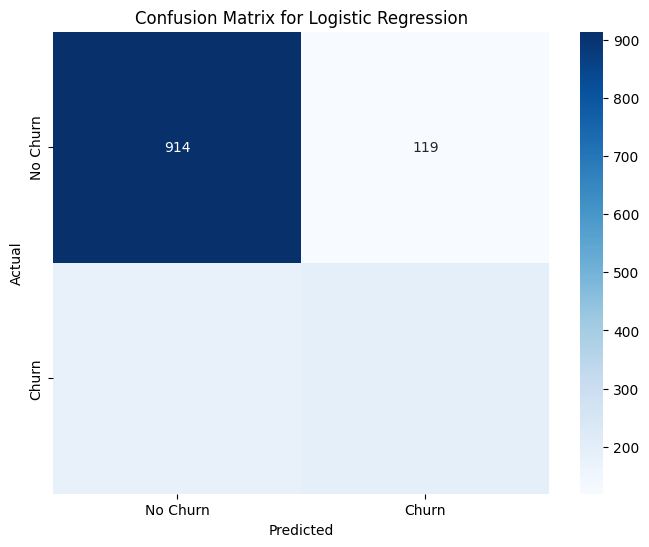

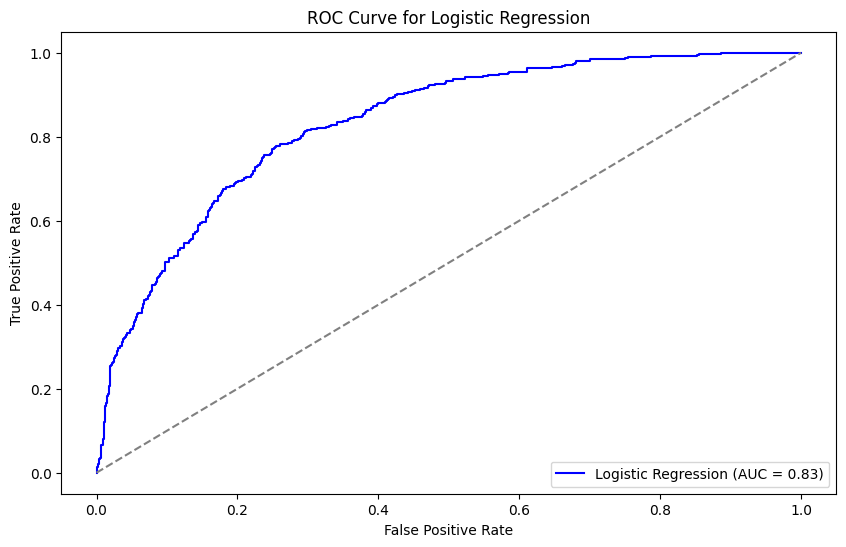

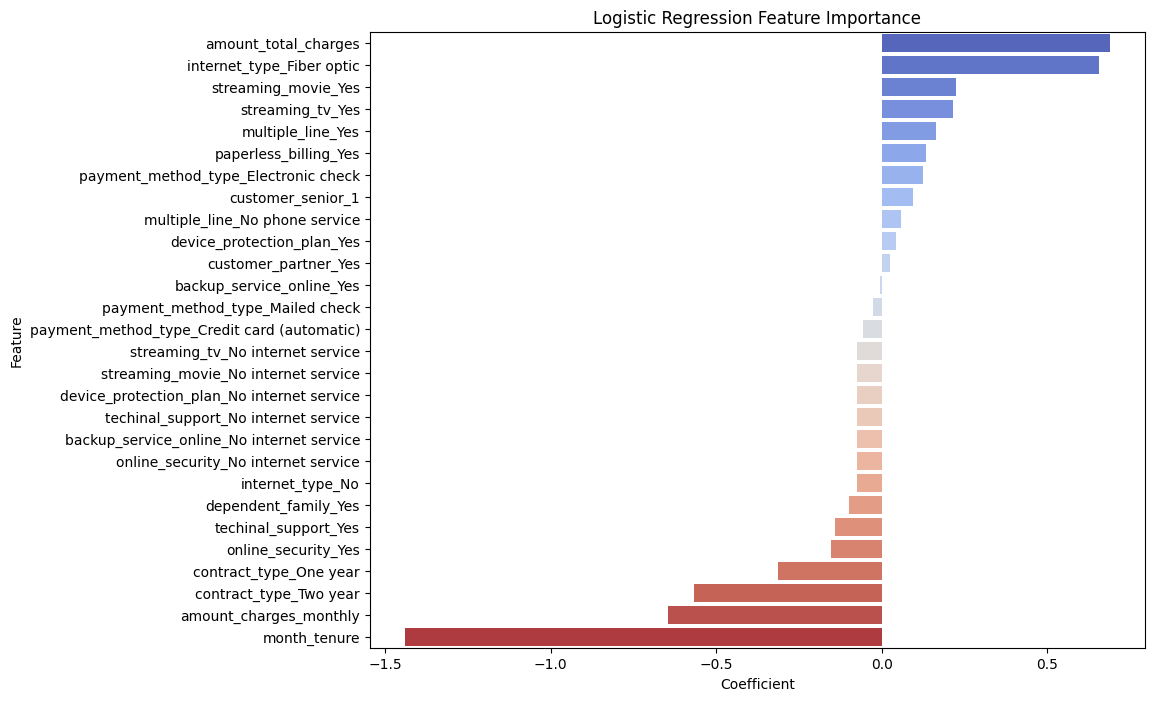

In [ ]:
# Step 1: Train the Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Step 2: Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]  # Get probability for positive class

# Step 3: Evaluate the model

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print(conf_matrix)

# Step 4: Additional Evaluation Metrics
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_log_reg)
print("ROC-AUC Score:", roc_auc)

# Cross-Validation Score
cross_val = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print("Cross-Validation Accuracy (5-fold):", cross_val)

# Step 5: Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Step 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Step 7: Analyze Model Coefficients (if features are scaled, coefficients represent the importance of each feature)
coeff_df = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=coeff_df['Coefficient'], y=coeff_df.index, palette='coolwarm')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Random Forest

Random Forest Accuracy: 0.7931769722814499
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[931 102]
 [189 185]]
ROC-AUC Score: 0.8190722209855517
Cross-Validation Accuracy (5-fold): 0.7950222222222223


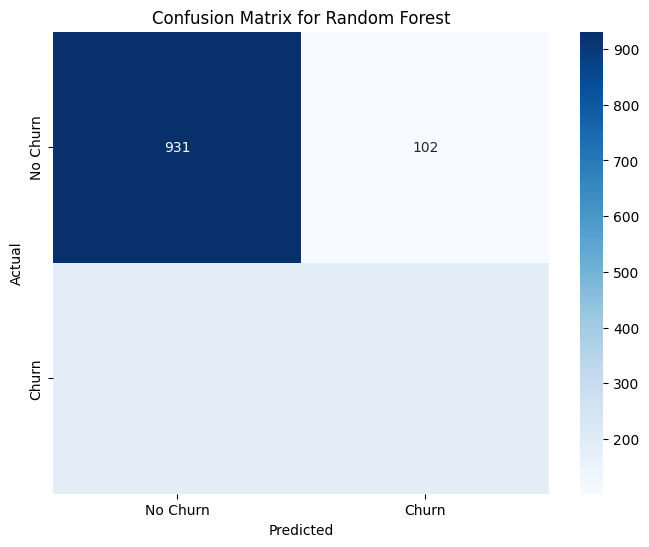

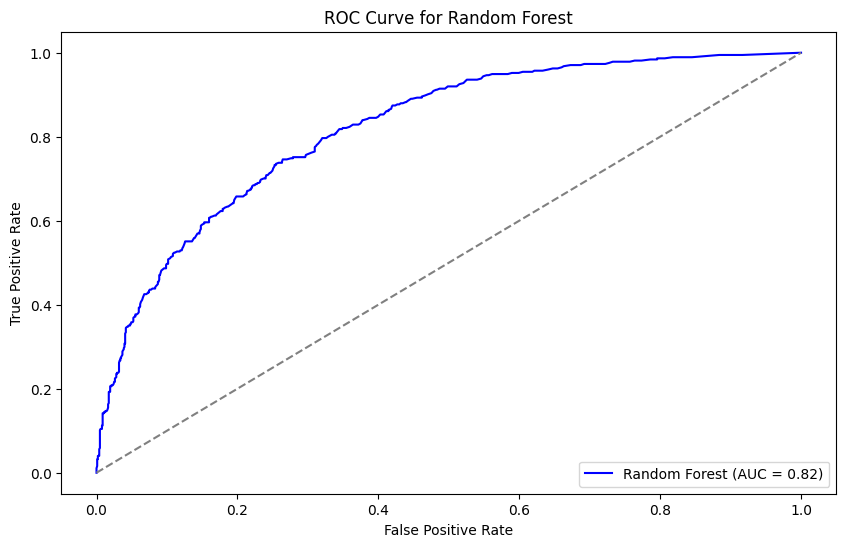

Random Forest Feature Importances:


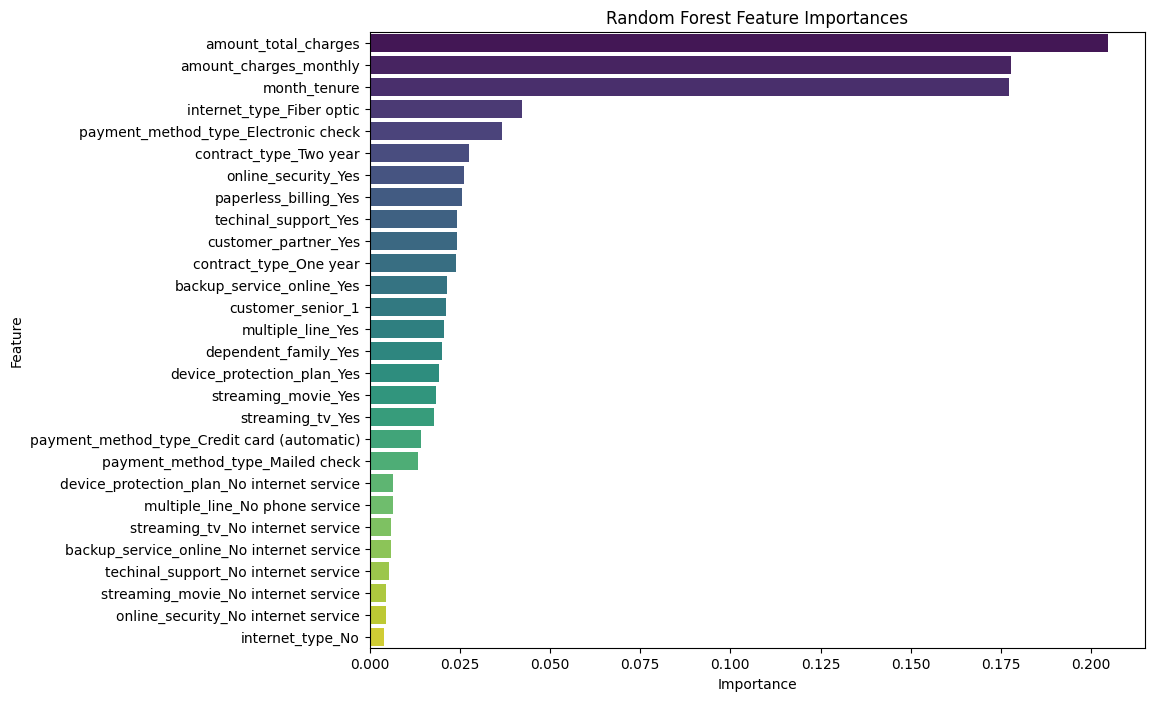

In [133]:
# Step 1: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Get probability for positive class

# Step 3: Evaluate the model

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Step 4: Additional Evaluation Metrics
# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)

# Cross-Validation Score
cross_val_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print("Cross-Validation Accuracy (5-fold):", cross_val_rf)

# Step 5: Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Step 6: Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Step 7: Analyze Feature Importances
# Feature importances can be extracted directly from the RandomForest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importances:")
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()